In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import scipy

### (a)

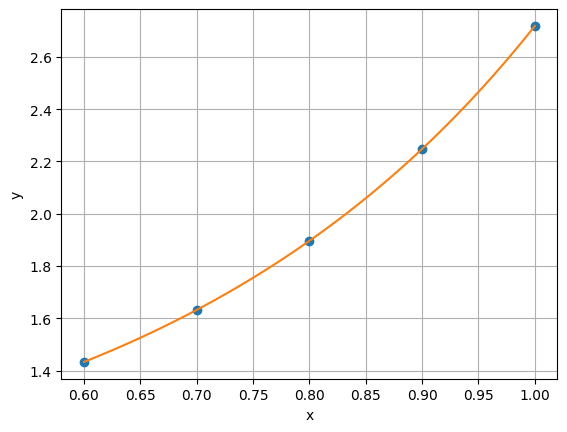

In [36]:
x = np.array([.6, .7, .8, .9, 1.0])
y = np.array([1.433329, 1.632316, 1.896481, 2.247908, 2.718282])


# newton diffenence interpolation
def newton(x, y):
    n = len(x)
    a = y.copy()
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            a[i] = (a[i] - a[i - 1]) / (x[i] - x[i - j])
    return a


# newton diffenence interpolation
def newton_inter(x, y, xx):
    a = newton(x, y)
    n = len(x)
    yy = a[n - 1]
    for i in range(n - 1, 0, -1):
        yy = a[i - 1] + (xx - x[i - 1]) * yy
    return yy


# plot
xx = np.linspace(0.6, 1, 100)
yy = newton_inter(x, y, xx)
plt.plot(x, y, 'o', xx, yy, '-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (b)

In [5]:
print(newton_inter(x, y, 0.82))
print(newton_inter(x, y, 0.98))

1.9589097744
2.6128479663999995


### (c) 计算误差

In [6]:
f = lambda x: np.exp(x ** 2)

In [22]:
xs = sympy.Symbol('x')
g = sympy.exp(xs ** 2)
# 求四阶倒数
gs_d4 = sympy.diff(g, xs, 4)
gs_d4

4*(4*x**4 + 12*x**2 + 3)*exp(x**2)

In [13]:
gd_4 = sympy.lambdify(xs, gs_d4)

In [24]:
error = lambda x: np.abs((x - .6) * (x - .7) * (x - .8) * (x - .9) * (x - 1.0) * gd_4(1) / np.math.factorial(4))

In [25]:
print(error(0.82))
print(error(0.98))

6.54475279274425e-05
0.0002637733701318147


In [26]:
# 实际误差计算
print(np.abs(f(0.82) - newton_inter(x, y, 0.82)))
print(np.abs(f(0.98) - newton_inter(x, y, 0.98)))

2.3348514214704963e-05
0.00010660542393381434


可见实际误差小于最大误差

### (d)

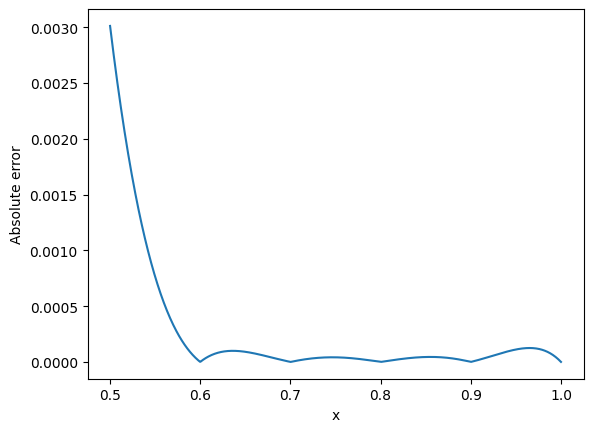

In [44]:
xx = np.linspace(0.5, 1, 1000)
yy = np.abs(f(xx) - newton_inter(x, y, xx))
plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.show()

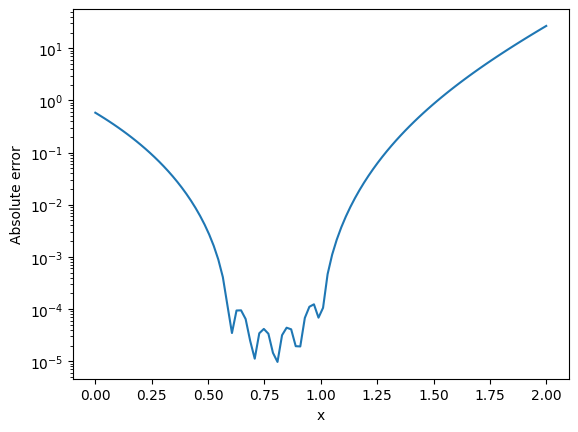

In [46]:
xx = np.linspace(0, 2, 100)
yy = np.abs(f(xx) - newton_inter(x, y, xx))
plt.plot(xx, yy)
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.show()